# Classifying Diagonosis by SES Factors

## Data Exploration

In this section we will begin to explore the dataset to determine relevant information.

In [1]:
import os
import json
import time
import pickle
import requests


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt"

def fetch_data(fname='fertility_Diagnosis.txt'):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'wb') as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data()

In [3]:
DATA

'/Users/mtm101/XBUS-505-01.Data_Analysis_II_Machine_Learning/fertility_Diagnosis.txt'

In [4]:
FEATURES  = [
    "season_of_analysis", #(winter=-1,spring=-0.33,summer=.33,fall=1) 
    "age", #18-36(0,1)
    "childhood_disease",#(yes=0,no=1)
    "accident_or_trauma",#(yes=0,no=1)
    "surgical_intervention",#(yes=0,no=1)
    "high_fevers",#(less than three months ago=-1, more than three months ago=0, no=1)
    "alcohol",#several times a day, every day, several times a week, once a week, hardly ever or never(0,1)
    "smoking",#never=-1, occasional=0, daily=1
    "hours_sitting", #1-16(0,1)
    "diagnosis" #normal=N, altered=O
]

LABEL_MAP = {
    1: "Normal_Diagnosis", 
    2: "Altered_Diagnosis",
}

# Read the data into a DataFrame
df = pd.read_csv(DATA, sep=',', header=None, names=FEATURES)

# Convert class labels into text
for k,v in LABEL_MAP.items():
    df.loc[df.diagnosis == k, 'diagnosis'] = v

# Taking a closer look at the data
df.head()

,season_of_analysis,age,childhood_disease,accident_or_trauma,surgical_intervention,high_fevers,alcohol,smoking,hours_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [5]:
# Describe the dataset
df.describe()

,season_of_analysis,age,childhood_disease,accident_or_trauma,surgical_intervention,high_fevers,alcohol,smoking,hours_sitting
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.078900,0.669000,0.870000,0.440000,0.510000,0.190000,0.832000,-0.350000,0.406800
std,0.796725,0.121319,0.337998,0.498888,0.502418,0.580752,0.167501,0.808728,0.186395
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*df.shape))

# Determine the frequency of each class of diagnosis
print(df.groupby('diagnosis')['diagnosis'].count())

100 instances with 10 features

diagnosis
N    88
O    12
Name: diagnosis, dtype: int64


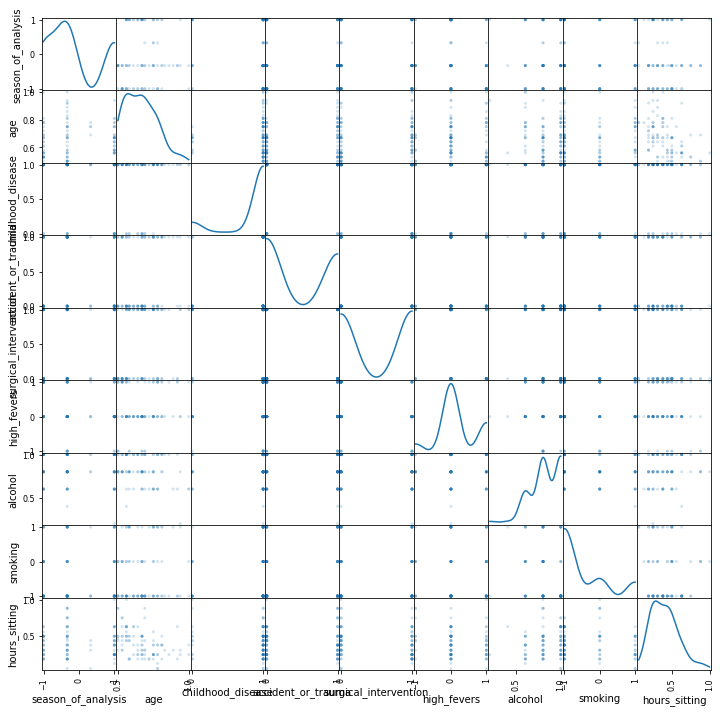

In [7]:
# Create a scatter matrix of the dataframe features
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

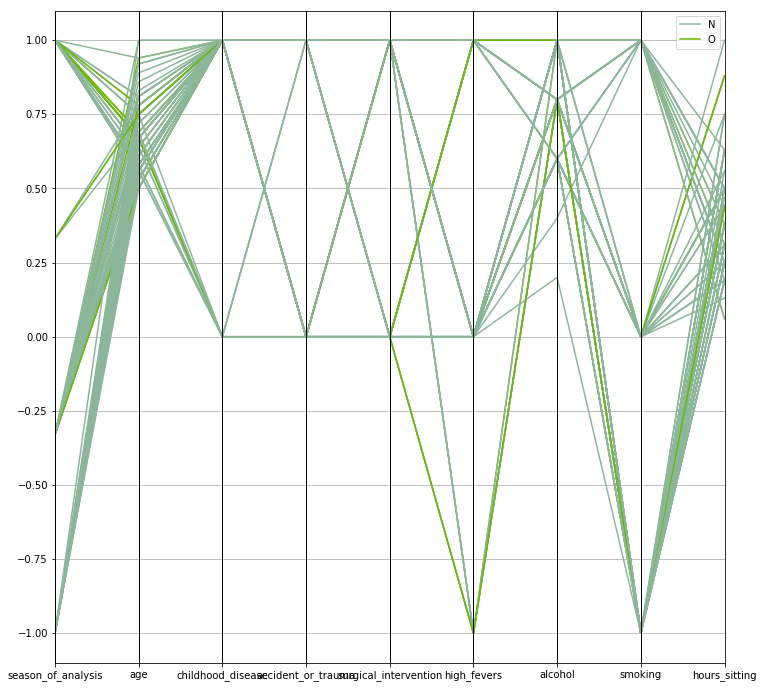

In [8]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12,12))
parallel_coordinates(df, 'diagnosis')
plt.show()

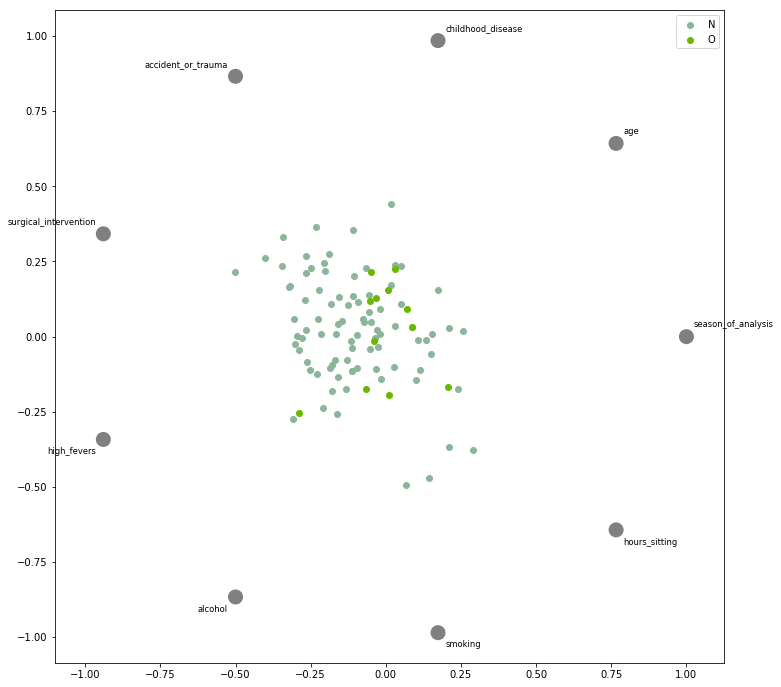

In [9]:
from pandas.plotting import radviz
plt.figure(figsize=(12,12))
radviz(df, 'diagnosis')
plt.show()

## Data Extraction

One way that we can structure our data for easy management is to save files on disk. The Scikit-Learn datasets are already structured this way, and when loaded into a Bunch (a class imported from the datasets module of Scikit-Learn) we can expose a data API that is very familiar to how we've trained on our toy datasets in the past. A Bunch object exposes some important properties:
-  data: array of shape n_samples * n_features
-  target: array of length n_samples
-  feature_names: names of the features
-  target_names: names of the targets
-  filenames: names of the files that were loaded
-  DESCR: contents of the readme

In order to manage our data set on disk, we'll structure our data as follows:



In [13]:
from sklearn.datasets.base import Bunch

DATA_DIR = os.path.abspath(os.path.join( ".", "..", "","fertility"))
print(DATA_DIR)

# Show the contents of the data directory
for name in os.listdir(DATA_DIR):
    if name.startswith("."): continue
    print("- {}".format(name))

/Users/mtm101/data/fertility


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mtm101/data/fertility'